# Wichtige Pakete importieren

In [1]:
import numpy as np # Python-Bibliothek um mit effizient mit Arrays zu arbeiten
import pandas as pd # Bibliothek um mit tabellarischen Daten zu arbeiten

import matplotlib.pyplot as plt # Bibliothek zum Zeichnen

# Spielzeug-Daten laden und visualisieren

In [3]:
# Daten als pandas Dataframe laden

data = pd.read_csv("toydata.txt", sep="\t")
data

,x1,x2,label
0,0.77,-1.14,0
1,-0.33,1.44,0
2,0.91,-3.07,0
3,-0.37,-1.91,0
4,-0.63,-1.53,0
5,0.39,-1.99,0
6,-0.49,-2.74,0
7,-0.68,-1.52,0
8,-0.10,-3.43,0
9,-0.05,-1.95,0


In [7]:
# Spalte Daten in Punkte und labels
X = data[["x1", "x2"]].values
y = data["label"]

# Dimensionen prüfen
print(f"Dimensionen von X: {X.shape}", f"Dimensionen von y: {y.shape}", sep="\n")

Dimensionen von X: (20, 2)
Dimensionen von y: (20,)


In [14]:
data[data["label"]==0]

,x1,x2,label
0,0.77,-1.14,0
1,-0.33,1.44,0
2,0.91,-3.07,0
3,-0.37,-1.91,0
4,-0.63,-1.53,0
5,0.39,-1.99,0
6,-0.49,-2.74,0
7,-0.68,-1.52,0
8,-0.10,-3.43,0
9,-0.05,-1.95,0


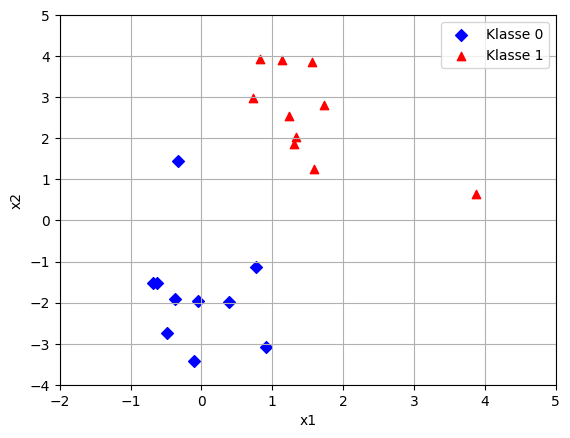

In [24]:
# zeichne Punkte mit label 0
plt.scatter(data[data["label"]==0].loc[:, "x1"], data[data["label"]==0].loc[:,"x2"],
            marker="D",
            c="blue",
            label="Klasse 0")

# zeichne Punkte mit label 1
plt.scatter(data[data["label"]==1].loc[:, "x1"], data[data["label"]==1].loc[:,"x2"],
            marker="^",
            c="red",
            label="Klasse 1"
            )

plt.xlim((-2,5))
plt.ylim((-4,5))
plt.xlabel("x1")
plt.ylabel("x2")
plt.grid()
plt.legend();


# Perceptron implementieren zur Klassifizierung der Punkte in Klasse 0 und 1

In [27]:
class Perceptron:
    # Contructor der Perceptron Klasse
    def __init__(self, num_features):
        self.num_features = 2
        self.bias = 0.0
        self.wheights = [0.0 for _ in range(num_features)]

    # Berechnung des Schwellenwertes
    def forward(self, x):
        wheighted_sum_z = self.bias
        for i, _ in enumerate(self.wheights):
            wheighted_sum_z += x[i]*self.wheights[i]

        if wheighted_sum_z>0:
            prediction = 1
        else:
            prediction = 0

        return prediction

    def update(self, x, y_true):
        y_pred = self.forward(x)
        error = y_true - y_pred

        self.bias += error
        for i,_ in enumerate(self.wheights):
            self.wheights[i] += x[i]*error
        return error


In [34]:
# Checken, ob alles läuft
perc = Perceptron(2)
print(f"Gewichte nach der Initialisierung: {perc.wheights}")
perc.update(X[11], 1)
print(f"Gewichte nach dem update: {perc.wheights}")

Gewichte nach der Initialisierung: [0.0, 0.0]
Gewichte nach dem update: [0.73, 2.97]


# Trainiere das Perceptron

In [41]:
def train(model, Xs, ys, epochs = 5):
    for epoch in range(epochs):
        error_count = 0
        for x,y in zip(Xs, ys):
            error = model.update(x,y)
            error_count += abs(error)
        print(f"Falsch klassifizierte Punkte nach {epoch+1} Epochen: {error_count}")

In [78]:
perceptron = Perceptron(num_features=2)
train(perceptron, X, y)

Falsch klassifizierte Punkte nach 1 Epochen: 1
Falsch klassifizierte Punkte nach 2 Epochen: 3
Falsch klassifizierte Punkte nach 3 Epochen: 1
Falsch klassifizierte Punkte nach 4 Epochen: 0
Falsch klassifizierte Punkte nach 5 Epochen: 0


# Visualisiere die Entscheidungsgrenze

In [79]:
perceptron.wheights

[2.86, 1.98]

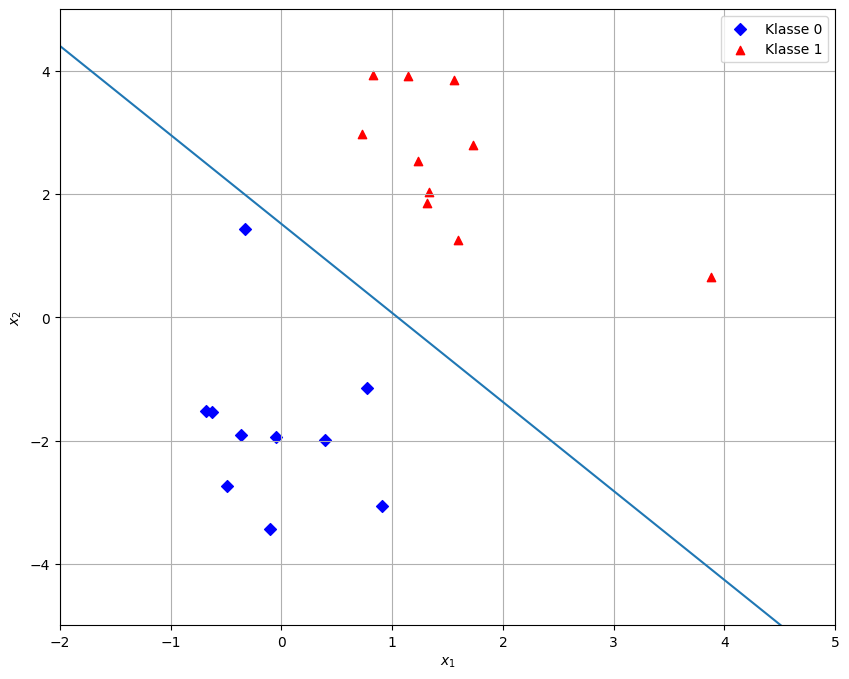

In [88]:
def plot_decision_boundaries(model, data, x_min, x_max, ax):
    # zeichne Punkte mit label 0

    ax.scatter(data[data["label"]==0].loc[:, "x1"], data[data["label"]==0].loc[:,"x2"],
                marker="D",
                c="blue",
                label="Klasse 0")

    # zeichne Punkte mit label 1
    ax.scatter(data[data["label"]==1].loc[:, "x1"], data[data["label"]==1].loc[:,"x2"],
                marker="^",
                c="red",
                label="Klasse 1"
                )

    w1 = model.wheights[0]
    w2 = model.wheights[1]
    b = model.bias
    if w2:
        ax.plot([x_min, x_max], [(-w1*x_min-b)/w2, (-w1*x_max-b)/w2])
    else:
        ax.plot([x_min, x_max], [0, 0])

    ax.set_xlim((x_min,x_max))
    ax.set_ylim((-5,5))
    ax.set_xlabel("$x_1$")
    ax.set_ylabel("$x_2$")
    ax.grid()
    ax.legend()

_, ax = plt.subplots(figsize=(10,8))
plot_decision_boundaries(perceptron, data, -2, 5, ax)

## Entscheidungsgrenze iterativ zeichnen

In [89]:
def train_with_boundary(model, Xs, ys, epochs = 5):
    _, axs = plt.subplots(nrows=epochs, figsize=(8, 20))
    for epoch in range(epochs):
        error_count = 0
        plot_decision_boundaries(model, data, -2,5, axs[epoch])
        for x,y in zip(Xs, ys):
            error = model.update(x,y)
            error_count += abs(error)
        print(f"Falsch klassifizierte Punkte in Epoche {epoch+1}: {error_count}")

Falsch klassifizierte Punkte in Epoche 1: 1
Falsch klassifizierte Punkte in Epoche 2: 3
Falsch klassifizierte Punkte in Epoche 3: 1
Falsch klassifizierte Punkte in Epoche 4: 0
Falsch klassifizierte Punkte in Epoche 5: 0


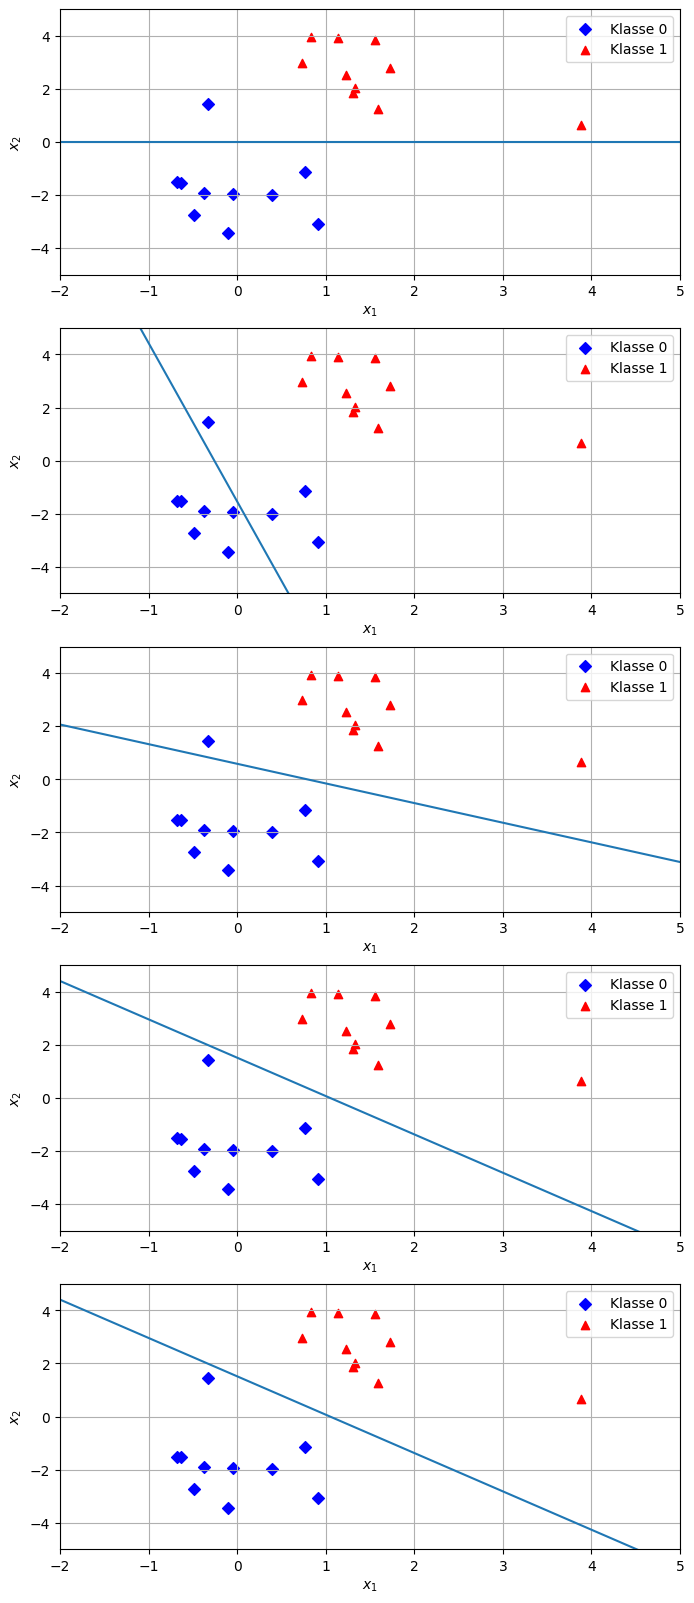

In [90]:
perceptron = Perceptron(2)

train_with_boundary(perceptron, X, y)

# Vorzeitiges Stoppen des Trainings

Wenn alle Punkte korrekt klassifiziert sind, soll der Trainingsprozess stoppen.

In [93]:
def train_with_early_stopping(model, Xs, ys, epochs = 5):
    for epoch in range(epochs):
        error_count = 0
        for x,y in zip(Xs, ys):
            error = model.update(x,y)
            error_count += abs(error)
        if error_count == 0:
            print(f"Alle Punkte korrekt klassifiziert. Training nach {epoch+1} Epochen gestoppt")
            break
        print(f"Falsch klassifizierte Punkte nach {epoch+1} Epochen: {error_count}")

In [94]:
perceptron = Perceptron(2)

train_with_early_stopping(perceptron, X, y)

Falsch klassifizierte Punkte nach 1 Epochen: 1
Falsch klassifizierte Punkte nach 2 Epochen: 3
Falsch klassifizierte Punkte nach 3 Epochen: 1
Alle Punkte korrekt klassifiziert. Training nach 4 Epochen gestoppt


# Perceptron anpassen: Gewichte und bias mit zufälligen Werten initialisieren

In [96]:
import random
class Perceptron:
    # Contructor der Perceptron Klasse
    def __init__(self, num_features):
        self.num_features = 2
        self.bias = random.random()
        self.wheights = [random.random() for _ in range(num_features)]

    # Berechnung des Schwellenwertes
    def forward(self, x):
        wheighted_sum_z = self.bias
        for i, _ in enumerate(self.wheights):
            wheighted_sum_z += x[i]*self.wheights[i]

        if wheighted_sum_z>0:
            prediction = 1
        else:
            prediction = 0

        return prediction

    def update(self, x, y_true):
        y_pred = self.forward(x)
        error = y_true - y_pred

        self.bias += error
        for i,_ in enumerate(self.wheights):
            self.wheights[i] += x[i]*error
        return error

Falsch klassifizierte Punkte nach 1 Epochen: 3
Falsch klassifizierte Punkte nach 2 Epochen: 1
Alle Punkte korrekt klassifiziert. Training nach 3 Epochen gestoppt


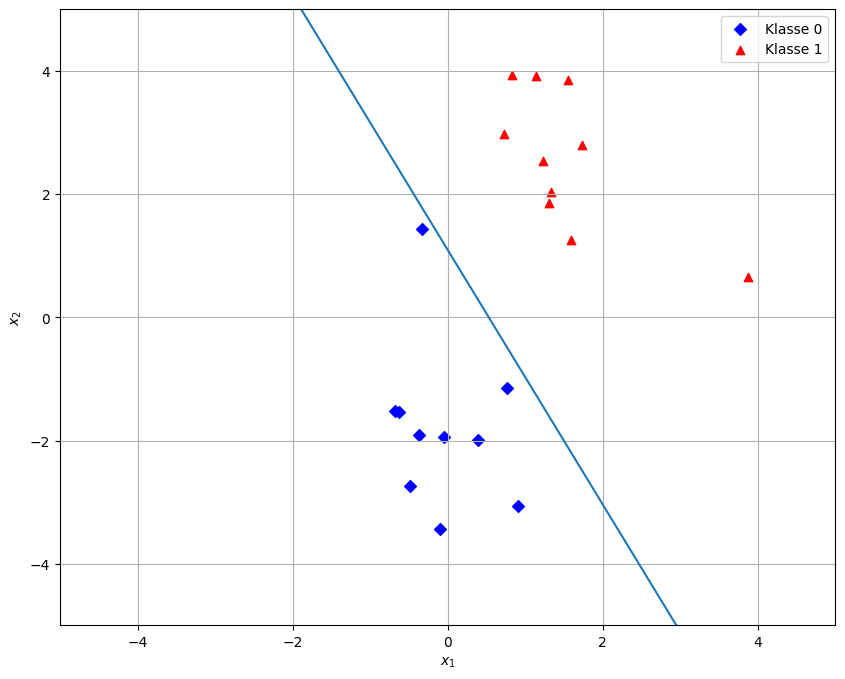

In [100]:
perceptron = Perceptron(2)

train_with_early_stopping(perceptron, X, y)

_, ax = plt.subplots(figsize=(10,8))
plot_decision_boundaries(perceptron, data, -5, 5, ax)

# Lernrate einbeziehen

In [101]:
import random
class Perceptron:
    # Contructor der Perceptron Klasse
    def __init__(self, num_features, lr=1):
        self.num_features = 2
        self.bias = random.random()
        self.wheights = [random.random() for _ in range(num_features)]
        self.lr = lr

    # Berechnung des Schwellenwertes
    def forward(self, x):
        wheighted_sum_z = self.bias
        for i, _ in enumerate(self.wheights):
            wheighted_sum_z += x[i]*self.wheights[i]

        if wheighted_sum_z>0:
            prediction = 1
        else:
            prediction = 0

        return prediction

    def update(self, x, y_true):
        y_pred = self.forward(x)
        error = y_true - y_pred

        self.bias += self.lr * error
        for i,_ in enumerate(self.wheights):
            self.wheights[i] += x[i]*error*self.lr
        return error

Falsch klassifizierte Punkte nach 1 Epochen: 3
Falsch klassifizierte Punkte nach 2 Epochen: 1
Alle Punkte korrekt klassifiziert. Training nach 3 Epochen gestoppt


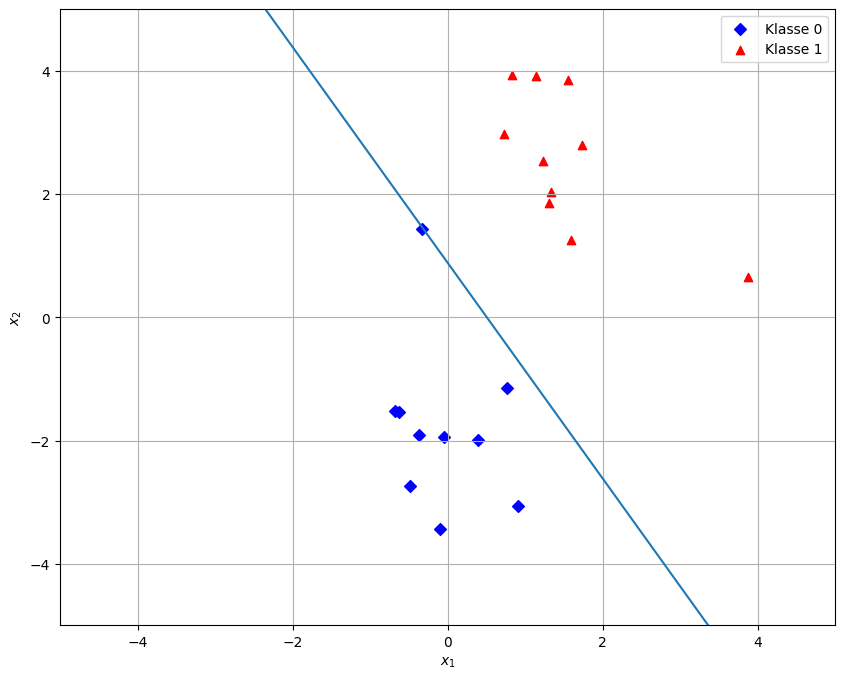

In [113]:
perceptron = Perceptron(2, lr=0.5)

train_with_early_stopping(perceptron, X, y)

_, ax = plt.subplots(figsize=(10,8))
plot_decision_boundaries(perceptron, data, -5, 5, ax)